### Name : Prathamesh Rokade
### Branch : AIML - C
### Roll No : 57
### Date : 06-08-24
### Machine Learning Practical 2

### Aim: 
### In the current automotive market, both buyers and sellers face challenges in determining the fair market value of used cars.Various factors such as the car's age, make, model, mileage, condition, andother features significantly impact its resale value. To facilitate informed decision-making and enhance transparency in the used car market, there is a need for an accurate predictive model that can estimate the price of a used car based on its attributes. Design & develop a machine learning model to predict the selling price of the car.

### Perform the EDA
### Apply linear regression
### Apply multiple linear regression
### Evaluate the performance using MAE, MSE, RMSE, R2Score
### Apply hyper parameter tuning to improve performance

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
# Load the dataset
file_path = 'car data.csv'
df = pd.read_csv(file_path)

### Perform EDA

In [47]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
# Display the last few rows of the dataset
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [49]:
# Display the shape of the dataset
df.shape

(301, 9)

In [50]:
# Display basic statistics of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [51]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [52]:
# Check for missing values
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


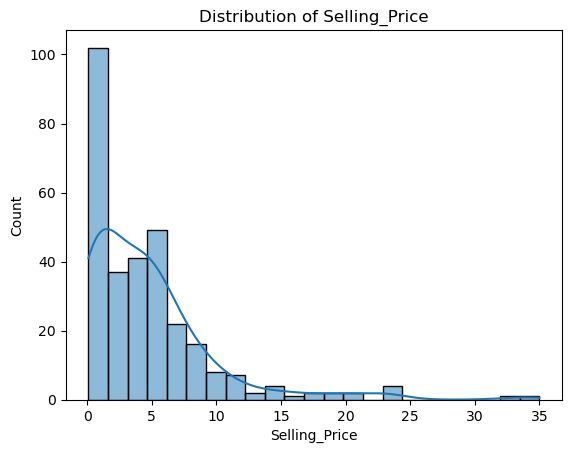

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


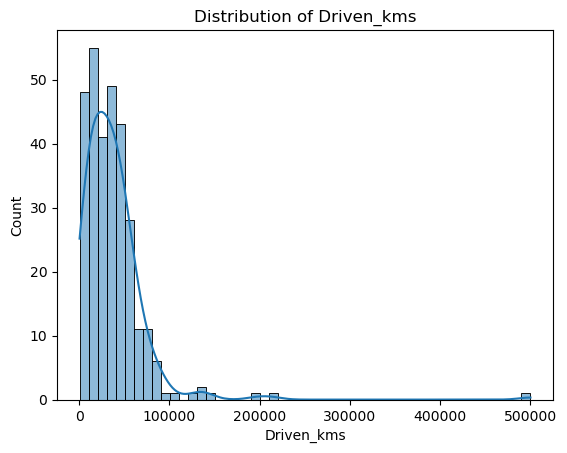

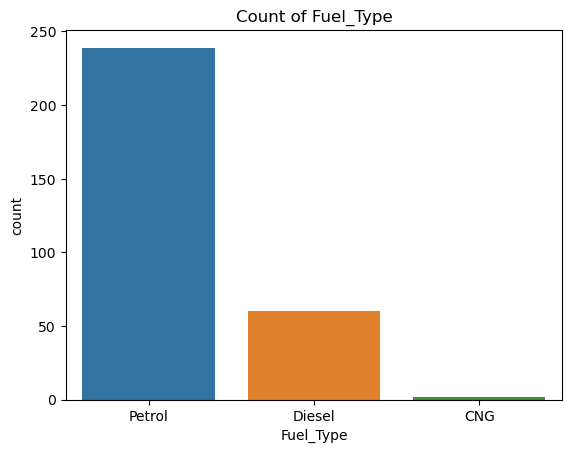

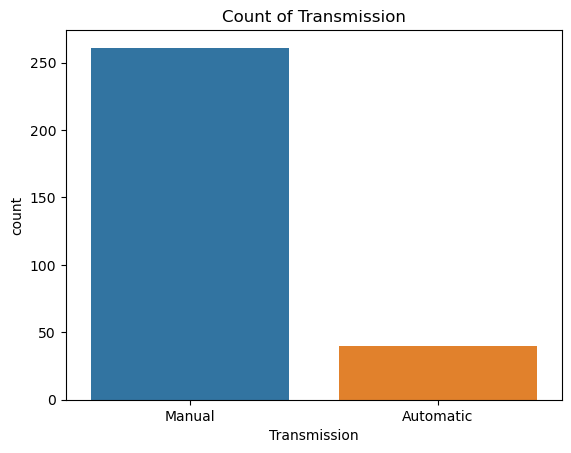

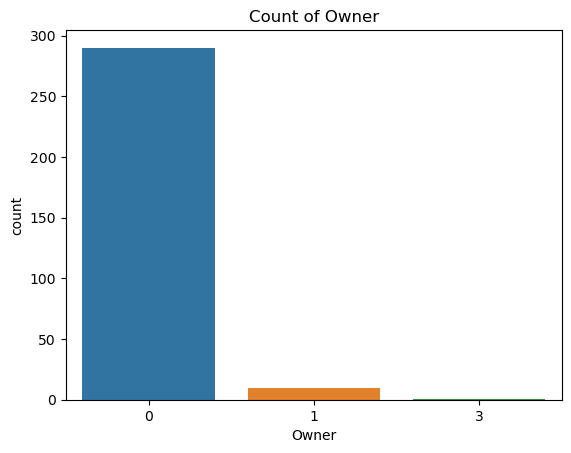

In [53]:
# Univariate Analysis for numerical variables
def univariate_analysis_numerical(df, column):
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis for categorical variables
def univariate_analysis_categorical(df, column):
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.show()

# Perform univariate analysis on numerical variables

univariate_analysis_numerical(df, 'Selling_Price')
# The histogram for Selling_Price is right-skewed,
# it suggests that most cars in the dataset are sold at lower prices, 
# with fewer cars being sold at higher prices. A normal distribution would imply a balanced spread of car prices.

univariate_analysis_numerical(df, 'Driven_kms')
# A histogram showing the distribution of kilometers driven can 
# indicate the typical usage of the cars in the dataset.
# A left-skewed distribution would suggest that most cars are relatively
# new (lower kilometers), while a right-skewed distribution would indicate older cars with more kilometers driven.

# Perform univariate analysis on categorical variables

univariate_analysis_categorical(df, 'Fuel_Type')
# The count plot reveals the most common fuel type among the cars in the dataset. 
#For instance, if petrol cars dominate the plot, it indicates that most cars are petrol-powered.

univariate_analysis_categorical(df, 'Transmission')
# This plot shows the distribution of manual vs. automatic cars.
# A significant skew toward one type suggests a preference or market availability.
# In this case Manual cars are in high demand.

univariate_analysis_categorical(df, 'Owner')
#  A count plot for Owner would reveal whether most cars are first-hand, second-hand, 
# or beyond. A higher count for first-hand owners might suggest a market with newer cars.
# Here it suggest that almost all cars are first hand owners

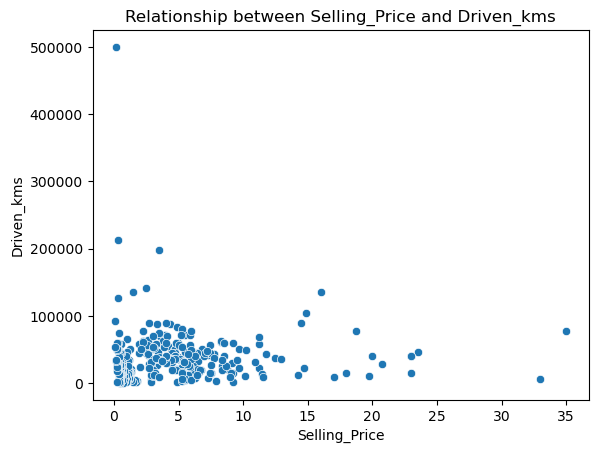

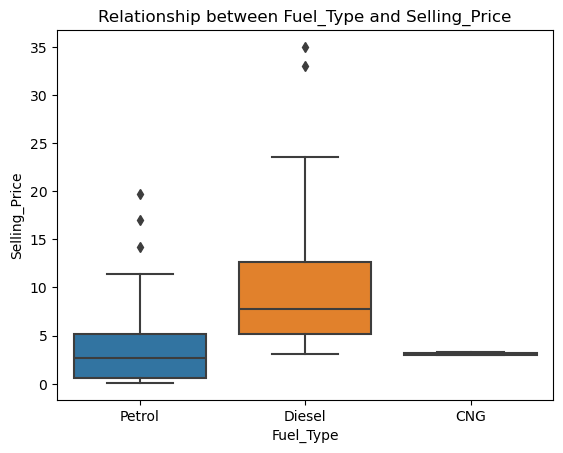

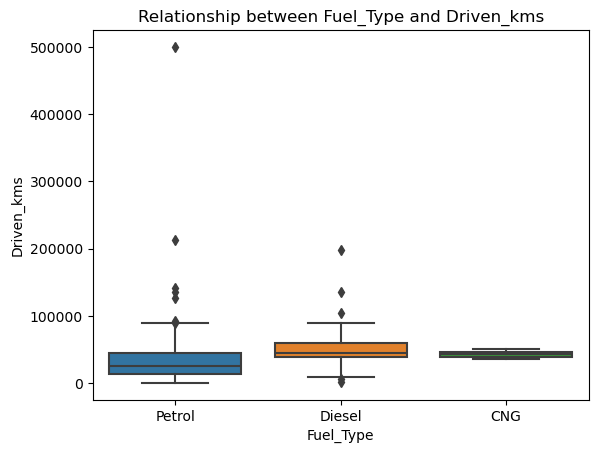

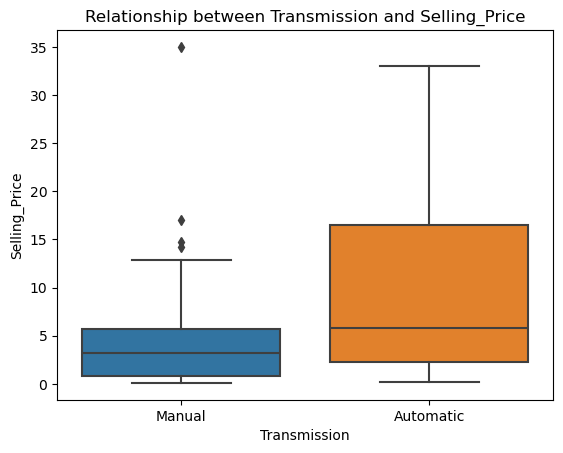

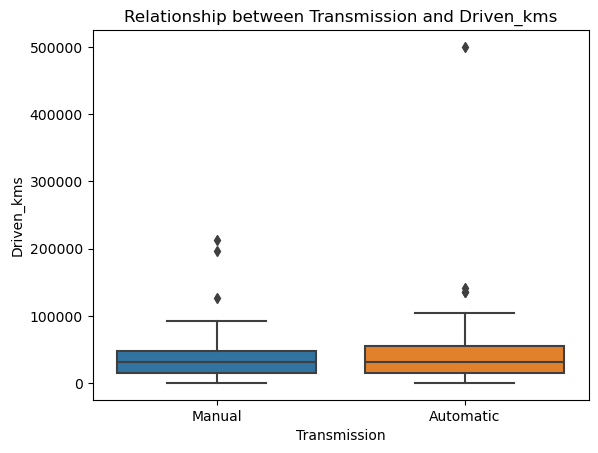

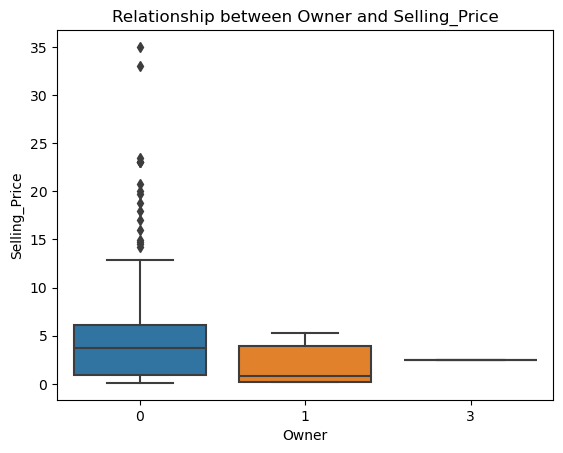

In [54]:
# Bivariate Analysis for numerical variables
def bivariate_analysis_numerical(df, x, y):
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Relationship between {x} and {y}')
    plt.show()

# Bivariate Analysis for categorical-numerical variables
def bivariate_analysis_categorical_numerical(df, x, y):
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f'Relationship between {x} and {y}')
    plt.show()

# Perform bivariate analysis on numerical variables
bivariate_analysis_numerical(df, 'Selling_Price', 'Driven_kms')
# If the scatter plot shows a downward trend, it implies that cars with higher
# kilometers driven tend to have a lower selling price. A lack of clear trend could 
# indicate that other factors are also significant in determining the price.

# Perform bivariate analysis on categorical-numerical variables
bivariate_analysis_categorical_numerical(df, 'Fuel_Type', 'Selling_Price')
# This box plot can show how selling prices vary by fuel type. If one type (e.g., diesel)
# consistently has higher median prices, it suggests that diesel cars might be more valuable or in higher demand.

bivariate_analysis_categorical_numerical(df, 'Fuel_Type', 'Driven_kms')
# This box plot can show how driven_kms vary by fuel type. If one type (e.g., diesel)
# consistently has higher median driven_kms, it suggests that diesel cars might more mileage.

bivariate_analysis_categorical_numerical(df, 'Transmission', 'Selling_Price')
# This box plot can show how Selling_Price vary by Transmission type. If one type (e.g., Automatic)
# consistently has higher median Selling_Price, it suggests that Automatic cars might be more valuable or in higher demand.

bivariate_analysis_categorical_numerical(df, 'Transmission', 'Driven_kms')
# This box plot can show how Driven_kms vary by Transmission type. But it varies for small fraction itself

bivariate_analysis_categorical_numerical(df, 'Owner', 'Selling_Price')
# This box plot can show how Selling_Price vary by number of Owner . If a car has one owner then it has
# consistently higher median Selling_Price, it suggests that first-hand owner cars might be more valuable or in higher demand.

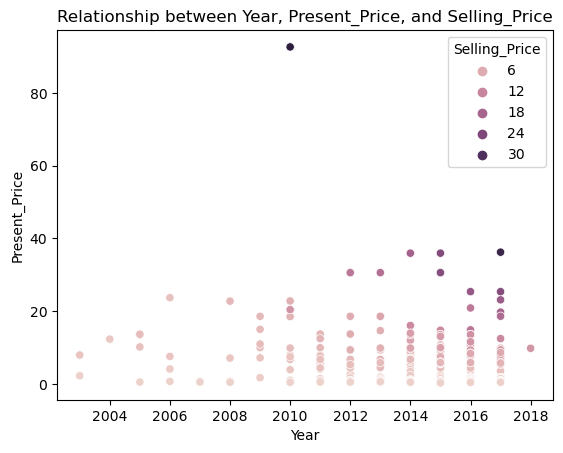

In [55]:
# Multivariate Analysis
def multivariate_analysis(df, x, y, z):
    sns.scatterplot(data=df, x=x, y=y, hue=z)
    plt.title(f'Relationship between {x}, {y}, and {z}')
    plt.show()

# Perform multivariate analysis
multivariate_analysis(df, 'Year', 'Present_Price', 'Selling_Price')
# This graph allow you to observe the relationships between multiple numerical variables.
# For example, the relationship between Selling_Price, Present_Price, and other features like 
# Year might show that newer cars (fewer years) with higher Present_Price tend to have higher prices.

### Linear Regression with the performance using MAE, MSE, RMSE, R2Score

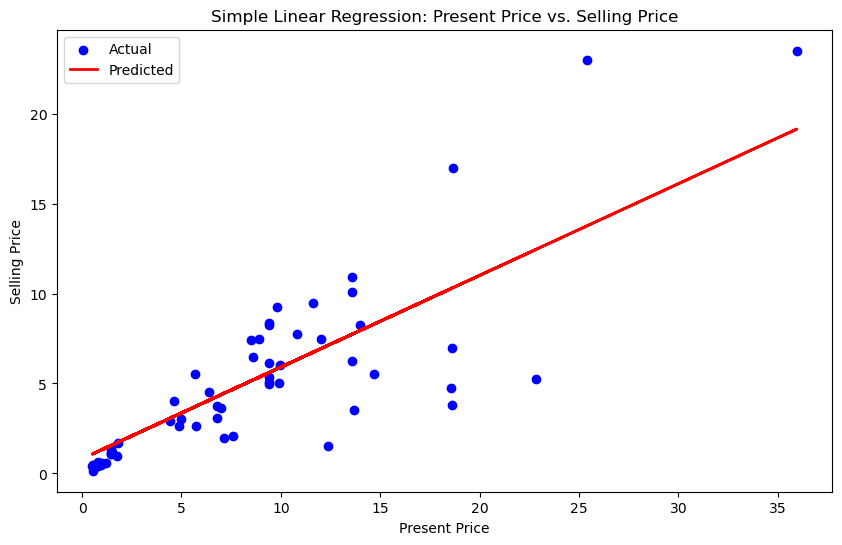

Simple Linear Regression Performance:
MAE: 1.8067531312373435
MSE: 7.201737126301044
RMSE: 2.683605247852419
R2 Score: 0.6873646891852214


In [57]:
# Simple Linear Regression
X = df[['Present_Price']]
y = df['Selling_Price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear = linear_model.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted')
plt.title('Simple Linear Regression: Present Price vs. Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend()
plt.show()
# The graph suggests a positive linear correlation between present price and selling price,
# meaning that as the present price increases, the selling price also tends to increase.
# However, the relationship is not perfectly linear, as there is some scatter in the actual data points.

# Evaluation metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Simple Linear Regression Performance:")
print(f"MAE: {mae_linear}")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"R2 Score: {r2_linear}")

### Multiple Regression with the performance using MAE, MSE, RMSE, R2Score

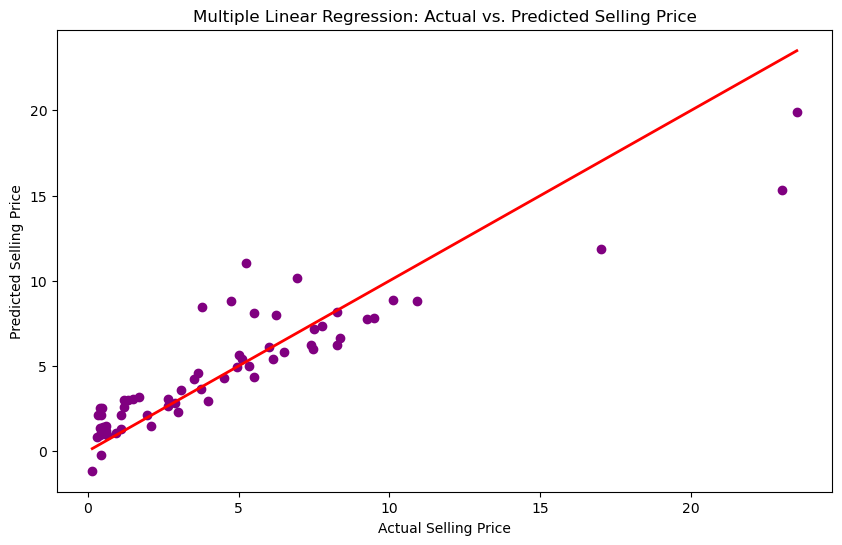

Multiple Linear Regression Performance:
MAE: 1.3943701771122174
MSE: 4.125555394840591
RMSE: 2.031146325314991
R2 Score: 0.8209051135122396


In [59]:
# Multiple Linear Regression
X_multi = df[['Year', 'Present_Price', 'Driven_kms', 'Owner']]
y_multi = df['Selling_Price']

# Splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Creating and training the model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train_multi)

# Predicting on the test set
y_pred_multi = multi_linear_model.predict(X_test_multi)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, color='purple')
plt.plot([min(y_test_multi), max(y_test_multi)], [min(y_test_multi), max(y_test_multi)], color='red', linewidth=2)
plt.title('Multiple Linear Regression: Actual vs. Predicted Selling Price')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()
# The plot suggests a positive correlation between the present price and selling price,
# meaning that as the present price increases, the selling price tends to increase as well.
# However, the model is not perfect, as the red line does not perfectly pass through all the blue dots.

# Evaluation metrics for Multiple Linear Regression
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("Multiple Linear Regression Performance:")
print(f"MAE: {mae_multi}")
print(f"MSE: {mse_multi}")
print(f"RMSE: {rmse_multi}")
print(f"R2 Score: {r2_multi}")


### Hyper parameter tuning to improve performance

In [61]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {'n_jobs': [-1]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the performance
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print('Best Model Performance:')
print('MAE:', mae_best)
print('MSE:', mse_best)
print('RMSE:', rmse_best)
print('R2 Score:', r2_best)

Best Parameters: {'n_jobs': -1}
Best Score: -6.47758796390629
Best Model Performance:
MAE: 1.8067531312373435
MSE: 7.201737126301044
RMSE: 2.683605247852419
R2 Score: 0.6873646891852214
